<a href="https://colab.research.google.com/github/outinletter/DataAnalysis/blob/main/K_ICT_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0%2C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EA%B0%95%EC%9D%98_1%EA%B0%95_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 강의
> https://www.youtube.com/watch?v=G1mpExQOAg8&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=19&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

> 파이썬 머신러닝 강의 04-2 - 머신러닝을 위한 통계학 핵심개념 - 기술통계

In [ ]:
import numpy as np
from scipy import stats

np.random.seed(0)

data = np.random.randint(0, 100, 1000)

mean = np.mean(data); print('평균값: ', mean.round(2))
median = np.median(data); print('중앙값: ', median)
mode = stats.mode(data); print('최빈값: {} ({})'.format(mode[0][0], mode[1][0]))

평균값:  49.4
중앙값:  49.0
최빈값: 0 (18)


In [ ]:
print(mode)

ModeResult(mode=array([0]), count=array([18]))


In [ ]:
import numpy as np
from statistics import variance, stdev

np.random.seed(0)

points = np.random.randint(0,100, 20)
var = variance(points); print('분산: ', var)
std = stdev(points); print('표준편차: ', np.round(std, 2))
range = np.max(points) - np.min(points); print('범위: ', range)

print('사분위수: ')
for val in [0, 25, 50, 75, 100]:
    quantile = np.percentile(points, val)
    print('{}% => {}'.format(val, quantile))

q1, q3 = np.percentile(points, [25, 75])
print('IQR: ', q3-q1)
# Interquartile range (사분위수 범위)

분산:  662
표준편차:  25.73
범위:  79
사분위수: 
0% => 9.0
25% => 42.75
50% => 64.5
75% => 84.0
100% => 88.0
IQR:  41.25


# 파이썬 머신러닝 강의 04-3 - 머신러닝을 위한 통계학 핵심개념 - 통계적 추론
> https://www.youtube.com/watch?v=KkmdDTswwOU&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=20&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

가설 검정: 
- 표본에 대한 통계적 테스트를 수행해 전체 모집단에 대한 추론을 만드는 과정으로, 귀무가설과 대립가설을 통해 가정이 통계적으로 의미가 있는지 검정함
- 모델링에서 각 독립 변수에 대해 0.05보다 작은 p-value(통계적 유의성) 는 유의미하다고 간주함

* 대립가설(연구가설) : 연구를 할 때 세우는 가설을 의미
* 귀무가설 : 통계적으로 의미가 있다는 것을 검정할 때 사용

- p-value: 귀무가설이 옳다는 전제 하에 표본에서 실제로 관측된 통계값과 같거나 더 극단적인 통계값이 관측될 확률


In [ ]:
import numpy as np
from scipy import stats

x_bar, mu, sigma, n = 196, 200, 5.3, 20

t_sample = (x_bar - mu) / (sigma / np.sqrt(float(n)))
print('검정 통계량: ', np.round(t_sample, 2))

alpha = 0.05
t_alpha = stats.t.ppf(alpha, n-1) # percent point function
print('t-table 로부터의 임계값: ', np.round(t_alpha, 3))

p_val = stats.t.sf(np.abs(t_sample), n-1) # survaival function
print('t-table 의 아래쪽 꼬리 p 값: ', np.round(p_val, 4))

# p_value값이 0.05로 유의수준보다 작으므로 귀무가설 기각 : 평균 200g 이라는 주장을 기각

검정 통계량:  -3.38
t-table 로부터의 임계값:  -1.729
t-table 의 아래쪽 꼬리 p 값:  0.0016


In [ ]:
import numpy as np
from scipy import stats

x, mu, s = 75, 56, 13.6
z=(x-mu)/s
print('z_score: ', np.round(z,2))

p_val = 1 - stats.norm.cdf(z)
print('학생이 {}점 이상 받을 확률 : {}%'.format(x, np.round(p_val*100,2)))

z_score:  1.4
학생이 75점 이상 받을 확률 : 8.12%


## 주요 정리
* p-value는 귀무가설이 옳다는 전제 하에 표본에서 실제로 관측된 통계값과 같거나 더 극단적인 통계값이 관측될 확률이다.
* 평균이 μ이고 분산이 σ2인 모집단으로부터 가능한 모든 n개의 조합을 표본으로 추출하면 표본의 평균은 정규분포에 접근한다.
* 카이제곱 검정은 범주형 데이터의 통계 분석에 사용되는 검정으로, 2개의 범주형 변수 사이에 독립성을 판단한다.
* ANOVA 분산분석은 모집단이 셋 이상인 경우, 이들의 평균이 서로 동일한지 테스트한다.

# 카이제곱 독립성 검정
> 2개의 범주형 변수에서 독립적인지, 상관관계가 있는지를 분석

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

np.random.seed(0)

smoke = ['안함', '가끔', '매일', '심함']
exercise = ['안함', '가끔', '매일']

data = {'smoke' :    np.random.choice(smoke, size = 500),
        'exercise' : np.random.choice(exercise, size=500)}
df = pd.DataFrame(data, columns=['smoke', 'exercise'])
df.head()

,smoke,exercise
0,안함,안함
1,심함,안함
2,가끔,매일
3,안함,가끔
4,심함,가끔


In [ ]:
xtab = pd.crosstab(df.smoke, df.exercise)
xtab

exercise,가끔,매일,안함
smoke,,,
가끔,38,39,45
매일,34,44,33
심함,45,44,51
안함,47,41,39


In [ ]:
contg = stats.chi2_contingency(observed=xtab)
p_val = np.round(contg[1],3)
print('P-값: ', p_val) # 0.05보다 크므로 흡연과 운동은 상관관계가 없다.

P-값:  0.668


# ANOVA 분산 분석
> Analysis of Variance
- 모집단이 셋 이상인 경우, 이들의 평균이 서로 동일한지 테스트함
- 귀무가설 : 모든 모집단의 평균에 차이가 없다.
- 대립가설 : 적어도 하나의 모집단의 평균에 차이가 있다.

>> t-검정 : 두 개 집단 평균의 차이를 구할 때  

* 10명의 환자를 대상으로 A,B,C 세 가지 수면제 약효(수면시간)를 각각 테스트할 경우, 유의수준 0.05에서 A,B,C 수면제의 평균 수면시간은 동일한가?

In [ ]:
data2 = (np.random.rand(30).round(2)*10).reshape(-1,3)
df2 = pd.DataFrame(data=data2, columns=['A', 'B', 'C'])
df2

,A,B,C
0,1.7,3.9,9.5
1,3.0,1.6,8.9
2,4.5,9.1,1.6
3,6.6,4.4,0.8
4,7.0,2.5,0.4
5,0.6,0.6,9.1
6,7.4,9.0,6.7
7,5.3,3.0,10.0
8,3.6,4.7,3.8
9,9.8,1.7,3.3


In [ ]:
one_way_anova = stats.f_oneway(df2.A, df2.B, df2.C)
print('통계량 : {}, p_value: {}'. format(np.round(one_way_anova[0],2), np.round(one_way_anova[1],3)))
# p value가 0.05 보다 크므로 귀무가설(차이가 없다, 동일하다) 채택

통계량 : 0.46, p_value: 0.638


# Scikit-Learn API
> Scikit-Learn 기초 및 데이터 표현 방식 이해

> https://www.youtube.com/watch?v=2VPFth2UqoI&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=22&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

In [ ]:
import numpy as np

rs = np.random.RandomState(10) # seed 값 특정하여 동일한 결과를 만들어 줌
x= 10 * rs.rand(5)
y = 2*x -1*rs.rand(5)
x.shape, y.shape

((5,), (5,))

In [ ]:
x, y

(array([7.71320643, 0.20751949, 6.33648235, 7.48803883, 4.98507012]),
 array([15.20161622,  0.21697612, 11.91243399, 14.80696681,  9.88180043]))

In [ ]:
X = x.reshape(-1,1) # 열을 1로 고정
X.shape

(5, 1)

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = iris.drop('species', axis=1)
X.shape

(150, 4)

In [ ]:
y = iris['species']
y.shape

(150,)

> bunch 객체를 이용한 특징 행렬(X), 대상 벡터(y)의 생성

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
print(iris.target) # y열에 해당하는 특징열

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = iris.data
y = iris.target

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X.shape, y.shape

((150, 4), (150,))

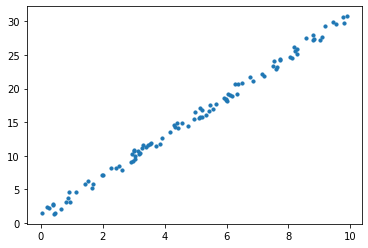

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
rs = np.random.RandomState(10)
x = 10*rs.rand(100)
y = 3*x + 2*rs.rand(100)
plt.scatter(x, y, s=10)

In [ ]:
x

array([7.71320643, 0.20751949, 6.33648235, 7.48803883, 4.98507012,
       2.24796646, 1.98062865, 7.60530712, 1.69110837, 0.88339814,
       6.85359818, 9.53393346, 0.03948266, 5.12192263, 8.12620962,
       6.12526067, 7.21755317, 2.91876068, 9.17774123, 7.14575783,
       5.42544368, 1.42170048, 3.7334076 , 6.74133615, 4.41833174,
       4.34013993, 6.17766978, 5.13138243, 6.50397182, 6.01038953,
       8.05223197, 5.21647152, 9.08648881, 3.19236089, 0.90459349,
       3.00700057, 1.13984362, 8.28681326, 0.46896319, 6.26287148,
       5.47586156, 8.19286996, 1.9894754 , 8.56850302, 3.51652639,
       7.54647692, 2.95961707, 8.8393648 , 3.25511638, 1.65015898,
       3.92529244, 0.93460375, 8.21105658, 1.5115202 , 3.84114449,
       9.44260712, 9.87625475, 4.56304547, 8.26122844, 2.51374134,
       5.97371648, 9.0283176 , 5.34557949, 5.90201363, 0.39281767,
       3.57181759, 0.7961309 , 3.05459918, 3.30719312, 7.73830296,
       0.39959209, 4.29492178, 3.14926872, 6.36491143, 3.46347

In [ ]:
x.shape, y.shape

((100,), (100,))

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=True)

In [ ]:
X = x.reshape(-1,1)
X.shape, y.shape

((100, 1), (100,))

In [ ]:
# X: 훈련데이터? , y: 대상 벡터
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regr.coef_

array([2.9855087])

In [ ]:
regr.intercept_

0.9878534341975644

In [ ]:
x_new = np.linspace(-1, 11, num=100)
x_new

array([-1.        , -0.87878788, -0.75757576, -0.63636364, -0.51515152,
       -0.39393939, -0.27272727, -0.15151515, -0.03030303,  0.09090909,
        0.21212121,  0.33333333,  0.45454545,  0.57575758,  0.6969697 ,
        0.81818182,  0.93939394,  1.06060606,  1.18181818,  1.3030303 ,
        1.42424242,  1.54545455,  1.66666667,  1.78787879,  1.90909091,
        2.03030303,  2.15151515,  2.27272727,  2.39393939,  2.51515152,
        2.63636364,  2.75757576,  2.87878788,  3.        ,  3.12121212,
        3.24242424,  3.36363636,  3.48484848,  3.60606061,  3.72727273,
        3.84848485,  3.96969697,  4.09090909,  4.21212121,  4.33333333,
        4.45454545,  4.57575758,  4.6969697 ,  4.81818182,  4.93939394,
        5.06060606,  5.18181818,  5.3030303 ,  5.42424242,  5.54545455,
        5.66666667,  5.78787879,  5.90909091,  6.03030303,  6.15151515,
        6.27272727,  6.39393939,  6.51515152,  6.63636364,  6.75757576,
        6.87878788,  7.        ,  7.12121212,  7.24242424,  7.36

In [ ]:
X_new = x_new.reshape(-1,1)
X_new.shape

(100, 1)

In [ ]:
y_pred = regr.predict(X_new) # 특징행렬(2차원 구조)을 regr 회귀 함수를 이용하여 예측

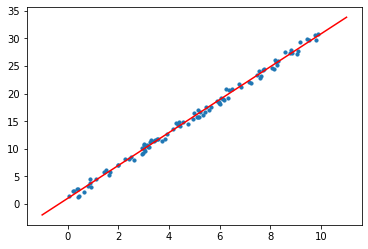

In [ ]:
plt.plot(x_new, y_pred, c='red')
plt.scatter(x, y, s=10)

# 모델 평가

In [ ]:
# 실제값 y와 예측값 y_pred 비교 평가, 0에 가까우면 예측이 잘됨
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

13.708237122486333

# 05-3 - Scikit-Learn 활용 훈련, 테스트 데이터 분할
> https://www.youtube.com/watch?v=EgVmG1_Mllc&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=24&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

In [ ]:
X = iris.data
y = iris.target

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X) # 훈련된 데이터를 그대로 예측 모델 적용, 테스트 데이터 분리 필요

In [ ]:
np.mean(y==y_pred)

1.0

> 머신러닝 모델을 만들 때 사용한 데이터는 모델의 성능 측정용으로 사용하지 않음(일반화 문제)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=25)

In [ ]:
X_train.shape, y_train.shape, X_test.shape , y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0])

In [ ]:
np.mean(y_test == y_pred)

0.9

# 하이퍼 파라미터의 선택

In [ ]:
train_accuracy = []
test_accuracy = []

neighbors = range(1, 11)

for n in neighbors :
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# 교차 검증
## 06-1 - 머신러닝 교차검증 개념 및 기법
- 교차 검증은 모델의 변동성을 줄여주며 오버피팅과 같은 문제를 막아줌

> https://www.youtube.com/watch?v=h5rvZQ8hl6k&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=27&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

## k 폴드 교차 검증
- 데이터를 무작위로 k개의 동일한 크기인 폴드로 나눔(보통 k값으로 3, 5, 10을 많이 사용)
- 각 시행 단계에서 특정 폴드를 테스트용, 나머지는 학습용으로 사용
- 각 폴드를 테스트 세트로 한 번씩 사용하고 이 과정을 k번 반복 시행
- 최종적으로 모델 성능의 평균을 계산

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

## 단일 관측치 제거 방식

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
scores.mean()

0.96

# 편향-분산 트레이드 오프
> https://www.youtube.com/watch?v=haJHSSX37kU&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=29&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

In [ ]:
from sklearn.preprocessing import PolynomialFeatures # 다항식의 차수 증가
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.pipeline import make_pipeline # 객체들이 전처리와 모델을 같이 수행, 생산성이 높아짐
import numpy as np

np.random.seed(1)
X = np.random.rand(40,1 ) **2  # 40행, 1열
y = (10 - (X.ravel()+ 0.1)) + np.random.randn(40) # 오차 부여

In [ ]:
X.shape

(40, 1)

In [ ]:
X.ravel().shape # 2차 행렬을 flat 시킴

(40,)

In [ ]:
y.shape

(40,)

In [ ]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [ ]:
import numpy as np

def make_data(N, err=1.0, seed=1):
    np.random.seed(seed)
    X = np.random.rand(N, 1) ** 2
    y = 10 -1.0 / (X.ravel() + 0.1)
    if err > 0 :
        y += err * np.random.randn(N)
    return X, y

X, y = make_data(40)

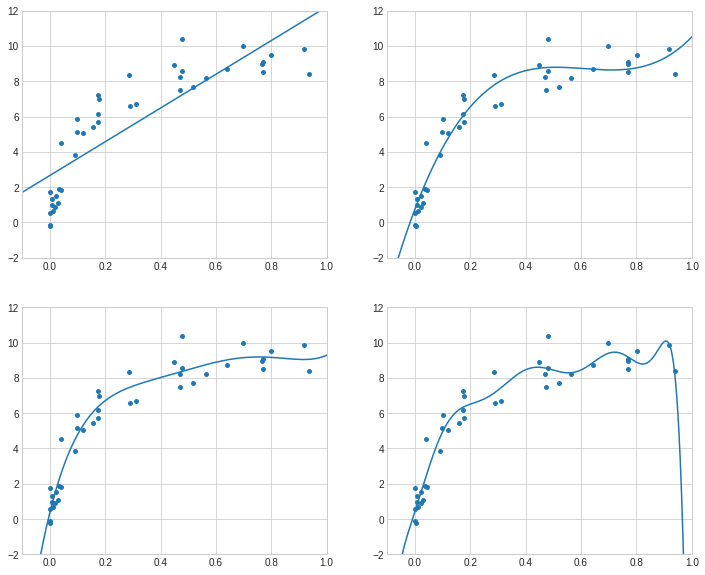

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1)

fig = plt.figure(figsize=(12, 10))

for i, degree in enumerate([1,3,5,10], start=1):
    ax= fig.add_subplot(2, 2, i)
    ax.scatter(X.ravel(), y, s=15)
    y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression())\
                    .fit(X, y).predict(X_test) # 선형 모델을 비선형 구조로 변환
    ax.plot(X_test.ravel(), y_test, label='degree={}'.format(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2,12)

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

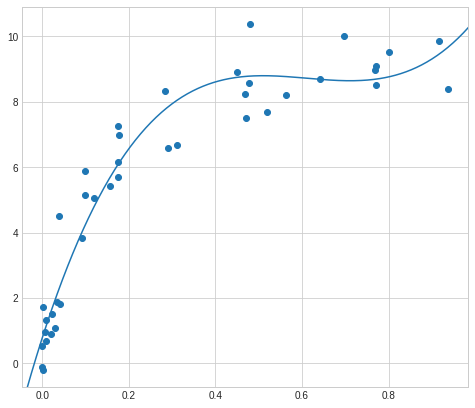

In [ ]:
plt.figure(figsize = (8,7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

## 편향과 분산 사이의 트레이드오프에서 가장 효율적인 지점 : 최적의 모델

> 데이터 규모가 증가하면 그래프, 검증 곡선이 바뀜

# 그리드 서치
> 그리드 서치를 통해 최적 모델과 데이터 적합을 찾음

> https://www.youtube.com/watch?v=4FGDcIMcUZo&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=31&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

In [ ]:
X.shape, y.shape

((40, 1), (40,))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures_degree ' : np.arange(21),
                        'linearregression_fit_intercept' : [True, False],
                         'linearregression_normailize  ' : [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [ ]:
import numpy as np
np.arange(21)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [ ]:
range(21)

range(0, 21)

In [ ]:
grid.fit(X, y);

In [ ]:
grid.best_params_

In [ ]:
model  = grid.best_estimator_

plt.figure(figsize = (8, 7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

# 코딩 실습 (6:50)

> https://www.youtube.com/watch?v=4FGDcIMcUZo&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=31&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

In [ ]:
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [ ]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
np.random.seed(1)
X = np.random.rand(40,1) **2. # 40행 1열
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40) # X numpy배열을 flat 시킴 + 오차값

In [ ]:
X

array([[1.73907352e-01],
       [5.18867376e-01],
       [1.30815988e-08],
       [9.14049845e-02],
       [2.15372915e-02],
       [8.52641608e-03],
       [3.46928663e-02],
       [1.19412216e-01],
       [1.57424429e-01],
       [2.90323473e-01],
       [1.75724041e-01],
       [4.69525764e-01],
       [4.18007224e-02],
       [7.71090232e-01],
       [7.50080261e-04],
       [4.49526682e-01],
       [1.74143298e-01],
       [3.12134324e-01],
       [1.97084925e-02],
       [3.92442000e-02],
       [6.41191864e-01],
       [9.37530479e-01],
       [9.82347155e-02],
       [4.79310604e-01],
       [7.68057946e-01],
       [8.00321082e-01],
       [7.23251789e-03],
       [1.52527609e-03],
       [2.88423714e-02],
       [7.71134256e-01],
       [9.67209972e-03],
       [1.77331632e-01],
       [9.17552352e-01],
       [2.84265221e-01],
       [4.78693941e-01],
       [9.95501134e-02],
       [4.71283524e-01],
       [6.96600012e-01],
       [3.34461088e-04],
       [5.62716493e-01]])

In [ ]:
y

array([ 7.24998644,  7.70041705, -0.12288892,  3.83970623,  1.50418461,
        1.31600899,  1.88404109,  5.0456151 ,  5.42819209,  6.59281674,
        5.70193919,  8.23148858,  1.8305394 ,  9.086429  ,  1.73425177,
        8.92229631,  6.16043712,  6.68597765,  0.8992155 ,  4.51082693,
        8.70162943,  8.39917725,  5.14639037, 10.37406543,  8.96816213,
        9.50648826,  0.9746409 , -0.20201375,  1.09605993,  8.50272859,
        0.67301646,  6.98083184,  9.856233  ,  8.32873282,  8.55755817,
        5.87386864,  7.49515774,  9.997533  ,  0.54626444,  8.1929663 ])

In [ ]:
X.shape, y.shape

((40, 1), (40,))

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
degree = np.arange(0,21)
degree.shape

(21,)

In [ ]:
train_score, val_score = validation_curve(make_pipeline(PolynomialFeatures(degree=2), LinearRegression()), X, y, 'Polynomialfeatures__degree', degree, cv=7)

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(degree, np.median(train_score, 1), 'b-', label ='training score')
plt.plot(degree, np.median(val_score, 1), 'r-', label ='validation score')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')
plt.legend(loc='best');

In [ ]:
X_test = np.linspace(-0.1, 1.1, 500).reshape(-1,1)

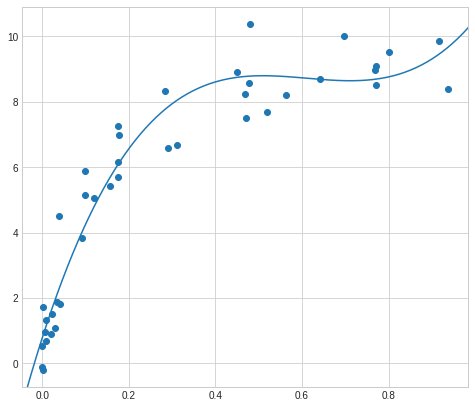

In [ ]:
plt.figure(figsize = (8,7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = make_pipeline(PolynomialFeatures(degree = 3), LinearRegression()).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_pred)
plt.axis(lim);

In [ ]:
from sklearn.model_selection import learning_curve

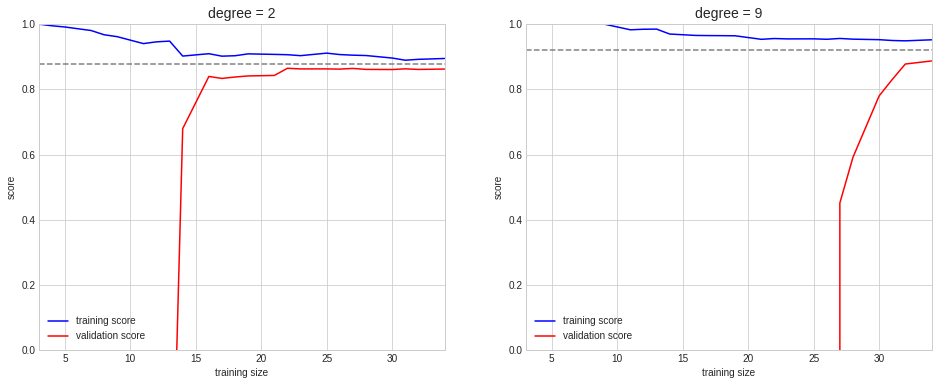

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16,6))
for i, degree in enumerate([2,9]):
    n, train_lc, val_lc = learning_curve(make_pipeline(PolynomialFeatures(degree),\
                                                       LinearRegression()), \
                                         X, y, cv=7, train_sizes=np.linspace(0.1, 1, 25))
    ax[i].plot(n, np.mean(train_lc, 1), 'b-', label='training score')
    ax[i].plot(n, np.mean(val_lc, 1),   'r-', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), n[0], n[-1], color = 'gray', linestyle='dashed')
    ax[i].set(xlim=(n[0], n[-1]), ylim=(0,1), xlabel = 'training size', ylabel='score')
    ax[i].set_title('degree = {}'.format(degree), size = 14)
    ax[i].legend(loc='best');

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [ ]:
# grid = GridSearchCV(make_pipeline(PolynomialFeatures(),
#                                  LinearRegression()), params, iid=True, cv=7)
grid = GridSearchCV(make_pipeline(PolynomialFeatures(),
                                  LinearRegression()), params, cv=7)

In [ ]:
grid.fit(X, y)

In [ ]:
grid.best_params_

In [ ]:
model = grid.best_estimator_
model

In [ ]:
plt.figure(figsize = (8,7))
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_pred = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_pred)
#plt.plot(y_test.ravel(), y_pred)
#plt.axis(lim)
plt.axis(lim);

# 06-6 특징 공학 및 데이터 변환 실습
> https://www.youtube.com/watch?v=aVUQWph066A&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=32&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

## 범주 특징의 변환

In [ ]:
data = [
        {'price': 1200000000, 'room':3, 'location': '잠실동'},
        {'price': 700000000, 'room':4, 'location': '천호동'},
        {'price': 1300000000, 'room':4, 'location': '신천동'},
        {'price': 450000000, 'room':2, 'location': '천호동'}
]

In [ ]:
# 수치형 데이터가 아닌 것을 0,1 수치형 데이터로 변환
import numpy as np
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False, dtype=np.int)
x = dv.fit_transform(data)
x

array([[         0,          1,          0, 1200000000,          3],
       [         0,          0,          1,  700000000,          4],
       [         1,          0,          0, 1300000000,          4],
       [         0,          0,          1,  450000000,          2]])

In [ ]:
print(x)

[[         0          1          0 1200000000          3]
 [         0          0          1  700000000          4]
 [         1          0          0 1300000000          4]
 [         0          0          1  450000000          2]]


In [ ]:
dv.get_feature_names()

['location=신천동', 'location=잠실동', 'location=천호동', 'price', 'room']

In [ ]:
# sparse 희소 행렬(예: 0 의미 없는 데이터가 많은 경우, 메모리를 적게 사용하는 장점)
dv= DictVectorizer(sparse = True, dtype=np.int)
dv.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

## 텍스트 특징의 변환 / 원핫인코딩(one-hot incoding)

In [ ]:
text = ['mobile phone', 'battleground mobile game', 'phone game']

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(text)
print(X)

  (0, 2)	1
  (0, 3)	1
  (1, 2)	1
  (1, 0)	1
  (1, 1)	1
  (2, 3)	1
  (2, 1)	1


In [ ]:
X, X.shape

(<3x4 sparse matrix of type '<class 'numpy.int64'>'
 	with 7 stored elements in Compressed Sparse Row format>, (3, 4))

In [ ]:
cv.fit_transform(text)

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

,battleground,game,mobile,phone
0,0,0,1,1
1,1,1,1,0
2,0,1,0,1


In [ ]:
#dv2 = cv.fit_transform(data)

In [ ]:
dv.get_feature_names()

['location=신천동', 'location=잠실동', 'location=천호동', 'price', 'room']

## Tfid는 빈도 뿐만 아니라 중요도와 관련되 가중치를 적용한 값을 적용함

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
X = tv.fit_transform(text)
print(X)

  (0, 3)	0.7071067811865476
  (0, 2)	0.7071067811865476
  (1, 1)	0.5178561161676974
  (1, 0)	0.680918560398684
  (1, 2)	0.5178561161676974
  (2, 1)	0.7071067811865476
  (2, 3)	0.7071067811865476


In [ ]:
pd.DataFrame(X.toarray(), columns = tv.get_feature_names())

,battleground,game,mobile,phone
0,0.000000,0.000000,0.707107,0.707107
1,0.680919,0.517856,0.517856,0.000000
2,0.000000,0.707107,0.000000,0.707107


## 유도 특징의 추가

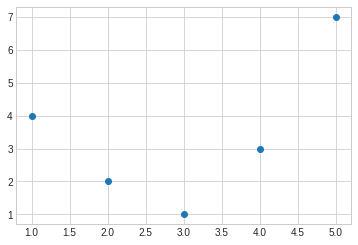

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x= np.arange(1,6)
y =np.array([4,2,1,3,7])
plt.scatter(x, y);

In [ ]:
from sklearn.linear_model import LinearRegression

X = x.reshape(-1,1)

In [ ]:
x, X

(array([1, 2, 3, 4, 5]), array([[1],
        [2],
        [3],
        [4],
        [5]]))

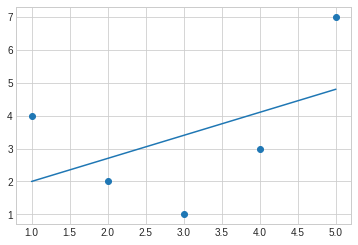

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_pred);
# 언더핏, 고편향된 모델임이므로 복작도를 높여주어야 함

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias = False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


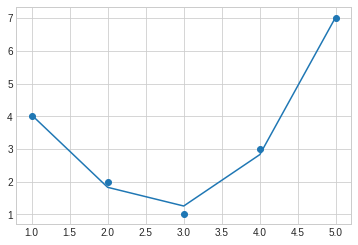

In [ ]:
model = LinearRegression()
model.fit(X2, y)
y_pred = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, y_pred)

## 누락 데이터 대체

In [ ]:
X = np.array([[np.nan, 0, 3],
              [3, 7, 9],
              [3, 5, 2],
              [4, np.nan, 6],
              [8, 8, 1]])
y = np.array([14, 16, -1, 8, -5])

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

## 특징 파이프라인

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree = 2), # 유도특징을 추구해 복잡도를 높임
                      LinearRegression())
# 누락 값을 평균으로 대체
# 이차 형태의 유도특징 변환
# 선형회귀 적합

In [ ]:
model.fit(X, y)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


## 실습

In [ ]:
 from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
text = [
        'a better tomorro',
        'a few good man',
        'happy day',
        'good morning'
]

In [ ]:
cvec = CountVectorizer()
X = cvec.fit_transform(text)
print(X)

  (0, 0)	1
  (0, 7)	1
  (1, 2)	1
  (1, 3)	1
  (1, 5)	1
  (2, 4)	1
  (2, 1)	1
  (3, 3)	1
  (3, 6)	1


In [ ]:
X.shape

(4, 8)

In [ ]:
import pandas as pd
pd.DataFrame(X.toarray(), columns = cvec.get_feature_names())
# stopwords 제거

,better,day,few,good,happy,man,morning,tomorro
0,1,0,0,0,0,0,0,1
1,0,0,1,1,0,1,0,0
2,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0


In [ ]:
import numpy as np
X = np.array([[np.nan, 0, 5],
              [4, 8, 9],
              [3, 6, 3],
              [5, np.nan, 8],
              [9, 5, 0]])
y = np.array([16, 14, 8, -3, -1])

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
X2 = imputer.fit_transform(X)
X2

array([[5.25, 0.  , 5.  ],
       [4.  , 8.  , 9.  ],
       [3.  , 6.  , 3.  ],
       [5.  , 4.75, 8.  ],
       [9.  , 5.  , 0.  ]])

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
pl = make_pipeline(SimpleImputer(strategy = 'mean'),
                   PolynomialFeatures(degree = 2), 
                   LinearRegression())

In [ ]:
pl.fit(X, y)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
print(pl.predict(X)), print(y)

[16. 14.  8. -3. -1.]
[16 14  8 -3 -1]


(None, None)

# 06-7 - 교차검증, 그리드 서치, 특징 공학 주요내용 정리

> https://www.youtube.com/watch?v=E729heRkpAY&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=33&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

- 교차 검증을 사용하면 모델을 훈련시킬 데이터를 빠뜨릴 수 있는 문제를 방지할 수 있다.
- 검증곡선을 시각화하면 모델의 복잡도와 관련된 편향과 분산 사이의 트레이드오프에서 적절한 지점을 확인할 수 있다.
- 학습곡선 플롯을 이용하면 훈련집합의 크기에 따른 훈련 점수와 검증 점수의 변화를 시각적으로 확인할 수 있다.
- 그리드 서치 자동화 도구를 이용하면 검증 점수를 최대화하는 최적의 모델을 찾아 데이터에 적합시킬 수 있다.
- 특징 공학을 통해 머신러닝의 특징 행렬의 구축하는데 필요한 범주형 데이터의 인코딩, 복잡도를 증가시키기 위한 유도 특징의 추가, 누락 데이터 대체 등의 작업을 수행하며, 파이프라인을 통해 작업의 생산성을 높일 수 있다.

# 07-1 - 와인 품질 데이터 탐색
> https://www.youtube.com/watch?v=4IzZ_3QGuG4&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=34&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

> 출력변수 : 와인품질평가점수(1점~10점), 분류의 범주형 보다 연속형으로 회귀로 해석함

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
redwine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';', header=0)
redwine['type'] = 'Red'
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [ ]:
whitewine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';', header=0)
whitewine['type'] = 'White'
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [ ]:
wine = redwine.append(whitewine)
wine.shape

(6497, 13)

In [ ]:
wine.columns = wine.columns.str.replace(" ", '_')
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [ ]:
wine.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4858,4859,4860,4861,4862,4863,4864,4865,4866,4867,4868,4869,4870,4871,4872,4873,4874,4875,4876,4877,4878,4879,4880,4881,4882,4883,4884,4885,4886,4887,4888,4889,4890,4891,4892,4893,4894,4895,4896,4897
fixed_acidity,7.4,7.8,7.8,11.2,7.4,7.4,7.9,7.3,7.8,7.5,6.7,7.5,5.6,7.8,8.9,8.9,8.5,8.1,7.4,7.9,8.9,7.6,7.9,8.5,6.9,6.3,7.6,7.9,7.1,7.8,6.7,6.9,8.3,6.9,5.2,7.8,7.8,8.1,5.7,7.3,...,6.4,6,6,5.5,5.9,6.2,6,6.2,5.7,5.3,5.8,6.6,6.1,5,6,5.7,5.6,7.4,6.2,5.9,6.2,6.6,6.6,5,5.5,4.9,6.5,6.6,6.2,6.2,6.8,4.9,6.1,5.7,6.5,6.2,6.6,6.5,5.5,6
volatile_acidity,0.7,0.88,0.76,0.28,0.7,0.66,0.6,0.65,0.58,0.5,0.58,0.5,0.615,0.61,0.62,0.62,0.28,0.56,0.59,0.32,0.22,0.39,0.43,0.49,0.4,0.39,0.41,0.43,0.71,0.645,0.675,0.685,0.655,0.605,0.32,0.645,0.6,0.38,1.13,0.45,...,0.35,0.43,0.52,0.31,0.22,0.36,0.41,0.355,0.41,0.6,0.23,0.24,0.32,0.2,0.42,0.21,0.2,0.22,0.38,0.54,0.53,0.34,0.34,0.235,0.32,0.47,0.33,0.34,0.21,0.41,0.22,0.235,0.34,0.21,0.23,0.21,0.32,0.24,0.29,0.21
citric_acid,0,0,0.04,0.56,0,0,0.06,0,0.02,0.36,0.08,0.36,0,0.29,0.18,0.19,0.56,0.28,0.08,0.51,0.48,0.31,0.21,0.11,0.14,0.16,0.24,0.21,0,0,0.07,0,0.12,0.12,0.25,0,0.14,0.28,0.09,0.36,...,0.51,0.34,0.33,0.29,0.3,0.32,0.23,0.35,0.21,0.34,0.31,0.33,0.28,0.4,0.41,0.32,0.36,0.26,0.42,0,0.02,0.4,0.4,0.27,0.13,0.17,0.38,0.4,0.28,0.22,0.36,0.27,0.29,0.32,0.38,0.29,0.36,0.19,0.3,0.38
residual_sugar,1.9,2.6,2.3,1.9,1.9,1.8,1.6,1.2,2,6.1,1.8,6.1,1.6,1.6,3.8,3.9,1.8,1.7,4.4,1.8,1.8,2.3,1.6,2.3,2.4,1.4,1.8,1.6,1.9,2,2.4,2.5,2.3,10.7,1.8,5.5,2.4,2.1,1.5,5.9,...,7.8,7.6,7.7,3,1.3,4,1.1,2,1.9,1.4,4.5,10.1,6.6,1.9,12.4,1.6,2.5,1.2,2.5,0.8,0.9,8.1,8.1,11.75,1.3,1.9,8.3,8.1,5.7,1.9,1.2,11.75,2.2,0.9,1.3,1.6,8,1.2,1.1,0.8
chlorides,0.076,0.098,0.092,0.075,0.076,0.075,0.069,0.065,0.073,0.071,0.097,0.071,0.089,0.114,0.176,0.17,0.092,0.368,0.086,0.341,0.077,0.082,0.106,0.084,0.085,0.08,0.08,0.106,0.08,0.082,0.089,0.105,0.083,0.073,0.103,0.086,0.086,0.066,0.172,0.074,...,0.055,0.045,0.046,0.027,0.052,0.036,0.066,0.046,0.048,0.031,0.046,0.032,0.021,0.015,0.032,0.03,0.048,0.035,0.038,0.032,0.035,0.046,0.046,0.03,0.037,0.035,0.048,0.046,0.028,0.023,0.052,0.03,0.036,0.038,0.032,0.039,0.047,0.041,0.022,0.02


In [ ]:
wine.T.values().head()

TypeError: ignored

In [ ]:
wine.describe() # 연속형 데이터에 대한 통계량

In [ ]:
wine.quality.describe()

In [ ]:
sorted(wine.quality.unique())

In [ ]:
wine.quality.value_counts()

In [ ]:
wine.groupby('type')['quality'].value_counts()

In [ ]:
wine.groupby('type')['quality'].describe()

In [ ]:
wine.groupby('type')['quality'].quantile([0,0.25, 0.5, 0.75, 1]).unstack('type')
# unstack: dataframe으로 변환

In [ ]:
red_q = wine.loc[wine['type'] == 'Red', 'quality']
white_q = wine.loc[wine['type'] == 'White', 'quality']

In [ ]:
pd.DataFrame(red_q)

In [ ]:
sns.set_style('darkgrid')
sns.distplot(red_q, norm_hist = True, kde = False, color = 'red', label='Red Wine')
sns.distplot(white_q, norm_hist = True, kde = False, color = 'blue', label='White Wine')
plt.title('Distribution of Quality of Wine Type')
plt.xlabel('Quality Score')
plt.ylabel('Density')
plt.legend();

In [ ]:
sns.set_style('darkgrid')
sns.distplot(red_q, color = 'red', label='Red Wine')
sns.distplot(white_q, color = 'blue', label='White Wine')
plt.title('Distribution of Quality of Wine Type')
plt.xlabel('Quality Score')
plt.ylabel('Density')
plt.legend();

In [ ]:
sns.set_style('darkgrid')
sns.distplot(red_q, norm_hist = True, color = 'red', label='Red Wine')
sns.distplot(white_q, norm_hist = True, color = 'blue', label='White Wine')
plt.title('Distribution of Quality of Wine Type')
plt.xlabel('Quality Score')
plt.ylabel('Density')
plt.legend();

## 품질 차이의 통계적 유의적 검정
> 귀무가설 정의 -> 표본 추출 -> 통계 기법을 통한 검정 -> 귀무가설 기각/채택

> 귀무가설 : 가설 검증에서 , 표본에 의하여 그 진위가 검증되어야 할 가설. 두 모수치 사이에 차이가 없다고 하는 가설로, 기각될 것을 상정하고 있으므로 이런 이름이 붙음. 기 가설이 기각되지 않으면 모수치들 사이에 확률적으로 차이가 없다고 결론 내리며, 기각된다면 차이가 있다고 결론.

> 모집단이 3개 이상일 때 ANOVA 분산 분석
  모집단이 2개 일때 t-검정

In [ ]:
wine.groupby('type')['quality'].aggregate(['std', 'mean'])

In [ ]:
import statsmodels.api as sm

t_stat, p_value, df = sm.stats.ttest_ind(red_q, white_q)
't-stat : {: .3f}, p-value : {: 4f}'.format(t_stat, p_value)

# df(degree of freedom) : 밀도 함수를 그릴 때 함수의 기울기
# 귀무가설 : 와인 종류별 품질의 차이는 없다. p-value > 0.05이면 평균 차이가 없음(귀무가설 채택)

In [ ]:
t_stat, p_value, df # 6495.0 : degree of freedom

In [ ]:
sm.stats.ttest_ind(red_q, white_q)[1] # p-value

In [ ]:
sm.stats.ttest_ind(red_q, white_q)[1] <= 0.05 # 귀무가설 기각, 평균의 차이가 있다.

_

## 07-3 - 와인 품질 데이터 상관 분석
> https://www.youtube.com/watch?v=OhXREH7orHs&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=36&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

In [ ]:
wine_corr = wine.corr()
wine_corr

In [ ]:
wine_corr.loc[wine_corr['quality']>0, 'quality'] # quality 열만 Series 출력

In [ ]:
wine_corr.loc[wine_corr['quality']<0, 'quality']

In [ ]:
wine_corr.loc[ (np.abs(wine_corr['quality']) > 0.3) & (np.abs(wine_corr['quality'] !=1)) , 'quality']
# 음수 중에서도 0보다 큰 값을 출력

## 07-4 - 와인 품질 데이터 탐색적 분석 실습
> 산점도 행렬

> https://www.youtube.com/watch?v=g3ErwN8AKkw&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=37&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

In [ ]:
red_sample = wine.loc[wine['type'] == 'Red', :]
white_sample = wine.loc[wine['type'] == 'White', :]

In [ ]:
red_idx = np.random.choice(red_sample.index, replace=True, size = 200)
white_idx = np.random.choice(white_sample.index, replace=True, size = 200)

In [ ]:
wine_sample = red_sample.loc[red_idx, ].append(white_sample.loc[white_idx, ])
wine_sample.head()

In [ ]:
wine_sample.shape

In [ ]:
sns.set_style('dark')
sns.pairplot(wine_sample, vars = ['quality', 'alcohol', 'residual_sugar'],
             kind='reg', plot_kws = {'ci': False, 'x_jitter': 0.25, 'y_jitter': 0.25},
             diag_kind = 'hist', diag_kws = {'bins': 10, 'alpha': 1},
             hue = 'type', palette = dict(Red='red', White='blue', markers = ['o', 's']))

> 17:40

> https://www.youtube.com/watch?v=g3ErwN8AKkw&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=38&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0 

In [ ]:
wine.shape

In [ ]:
wine.quality.value_counts()

## 07-5 - 단순 선형 회귀(OLS) 개념
> 최소 제곱법 : OLS(Ordinary Least Sqaures), LLS(Linear Least Squares)

> https://www.youtube.com/watch?v=eTTGN4FAPxk&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=38&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

> 단순 선형 회귀
- 회귀의 목표는 연속형(수치형) 반응 변수의 값을 예측하는 것
- 단순 선형 회귀란 설명 변수인 단일 특징과 단일 반응 변수 간에 선형 관계가 있다고 가정하고 초평면이라고 하는 선형 평면을 이용해 모델링한 것

## 08-2 - 선형회귀 모델 기반 와인 품질 예측 모델 학습

> https://www.youtube.com/watch?v=ByxvPA0Hybk&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=43&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

In [ ]:
wine.shape

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # 상수항을 사용할지 여부
model

> sckit-learn api를 사용하기 위해 DataFrmae 객체에서 특징 행렬(feature matrix, ndarry 2차원 배열)과 대상 벡터(ndarry 1차원 배열)이어야 함

In [ ]:
X = wine.drop(['type', 'quality'], axis=1)
X.shape

In [ ]:
y=wine.quality
y.shape

In [ ]:
from sklearn.model_selection import train_test_split

# 특징행렬과 대상벡터로 나눔(X 대문자: 2차원 구조, y 소문자 1차원 표현)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
#test_size 지정하지 않으면 25%
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.coef_ # 11개의 계수들

In [ ]:
model.intercept_

In [ ]:
newdata = np.array([6.3, 0.3, 0.34, 1.6, 0.049, 14, 132, 0.994, 3.3, 0.49, 9.5])

In [ ]:
model.predict(np.reshape(newdata, (1, 11)))

In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

In [ ]:
from sklearn.metrics import mean_squared_error

np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)

## 선형회귀 모델 성능 측정 및 와인 품질 예측 모델 만들기 실습

> https://www.youtube.com/watch?v=OXNTKInVuDk&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=44&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

> 모델의 성능 측정
- 평균 제곱근 오차 RMSE(Root Mean Square Error)
- 평균 제곱근 오차는 분산의 제곱근, 즉, 표준 오차가 됨

In [ ]:
def rmse(y_real, y_pred):
    return np.sqrt(np.mean((y_real-y_pred)**2))

In [ ]:
np.round(rmse(y_test, y_pred), 2)

## 08-4 - 규제 선형회귀 모델 개념 및 학습

> https://www.youtube.com/watch?v=w4_kU4Ilgtc&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=45&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

- 과분산 모델에 대해 모델을 규제하면 오버피팅을 감소시킬 수 있음 (차원수가 높아지는 것을 규제)
- 규제란 오버피팅된 파라미터 값에 대해 페널티를 부여하는 것
- 페널티를 추가하게 되면 규제가 없는 회귀 모델보다 계수의 절대값이 작아지게 되는 원리를 이용해 오퍼피팅을 방지할 수 있음
- 페널티를 가한다는 것은 편향을 높인다는 것을 의미하며, 규제가 없는 모델보다 훈련 데이터와의 적합도가 떨어지지만 전체적인 결과는 좋아짐
- 오버피팅된 모델은 지나친 노이즈를 반영할 수 있으므로 모델을 단순화하여 좀 더 일반화된 모델로 만들 필요가 있음

## 08-5 - 리지(Ridge)회귀 모델 개념 및 와인 품질 예측 모델 만들기 실습

> https://www.youtube.com/watch?v=Lw6AayMhl9s&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=46&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

In [ ]:
from sklearn.linear_model import Ridge

model_name = 'ridge'
alpha = 0.05
fig = plt.figure(figsize = (6,3))
ax = fig.add_subplot(111)
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)
coef = pd.Series(data=ridge.coef_, index = X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation =90)
ax.set_title('{0}: alpha = {1}, rmse = {2}'.format(model_name, alpha, rmse));

## 라쏘(Lasso)회귀 모델 기반 와인 품질 예측 모델 만들기 실습

> https://www.youtube.com/watch?v=Zb-6ZhT2zBE&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=47&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

- 덜 중요한 특징의 가중치(0)를 완전히 제거하려고 함
- 차수가 높은 다항 특징의 가중치를 0으로 만듦

In [ ]:
from sklearn.linear_model import Lasso

model_name = 'lasso'
alpha = 0.05
fig = plt.figure(figsize = (6,3))
ax = fig.add_subplot(111)
lasso = Lasso(alpha = alpha)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)
coef = pd.Series(data=lasso.coef_, index = X_train.columns).sort_values()
ax.bar(coef.index, coef.values)
ax.set_xticklabels(coef.index, rotation =90)
ax.set_title('{0}: alpha = {1}, rmse = {2}'.format(model_name, alpha, rmse));

## 주요 정리
- 선형 회귀 모델의 성능을 측정하는 평가 지표로 RMSE를 사용할 수 있다.
- 과분산 선형 회귀 모델에 대해 규제를 적용하면 오버피팅 문제를 감소시킬 수 있다.
- 리지 회귀 모델은 규제가 있는 선형 회귀 모델로 가중치 벡터의 제곱항을 합한 L2노름을 2로 나눈 값을 적용한다.
- 라쏘 회귀 모델은 규제가 있는 선형 회귀 모델로 가중치 벡터의 절대값의 합인 L1 노름을 적용한다.

# 09-3 - 의사결정트리 구현을 위한 CART 알고리즘

> https://www.youtube.com/watch?v=zE78KTsyoO0&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=51&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

- CART는 scikit-Learn의 디시젼 트리, 램덤 포레스트가 사용하는 내부 알고리즘
- Classification and Regression Tree
- 노드를 왼쪽, 오른쪽 자식 노드로 분할 확장하면서 트리를 생성함
- 분할 단계에서 가장 중요한 특징과 해당 값의 모든 가능한 조합을 측정 함수를 이용해 탐욕적으로 찾음
- 범주형 특징의 경우 해당 특징 값을 가진 샘플들을 오른쪽 자신 노드에 할당함
- 수치형 특징의 경우 해당 값보다 큰 값을 가진 샘플들을 오른쪽 자신 노드에 할당함

# 09-4 - 의사결정트리 scikit-learn 실습
> https://www.youtube.com/watch?v=2mH1WTXsv1g&list=PLwvr-xPygMX9TaQFW3C1UGEuD0zJF7pCk&index=52&ab_channel=K-ICT%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%BC%ED%84%B0

## 특징 행렬과 대상 벡터 준비

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = iris.data[:, 2:]

In [ ]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [ ]:
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
y= iris.target

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

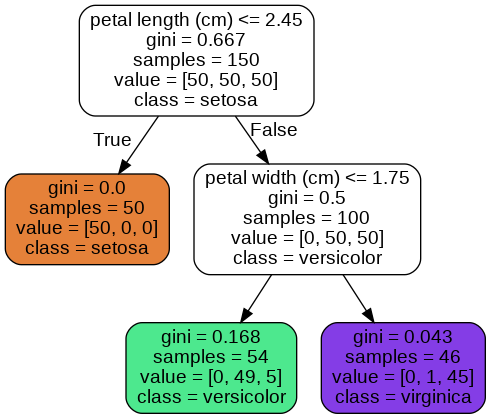

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='iris.dot', feature_names=iris.feature_names[2:],
                class_names = iris.target_names, rounded=True, filled=True, impurity=True)
import pydot
graph = pydot.graph_from_dot_file('iris.dot')[0]
iris_png = graph.create_png()

from IPython.core.display import Image
Image(iris_png)

In [ ]:
for feature, importance in zip(iris.feature_names[2:], tree.feature_importances_):
    print('{}: {}'.format(feature, importance))

petal length (cm): 0.5619909502262443
petal width (cm): 0.4380090497737556
